This notebook is dedicatied to showcasing a variety of spatial manipulation functions, which includes summaring column data and adding two columns to form another column.

In [1]:
# Importing the pandas and geopandas packages so that data and spatial data can be handled
import pandas as pd
import geopandas as gpd

C:\Users\dante\AppData\Local\Temp\ipykernel_22520\2412219844.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


These next few blocks are for summarizing data columns for the Former Municipality Boundaries Data file.

In [2]:
# Reading in the Former Municipality Boundaries Data file
fmbd = gpd.read_file('data/Former Municipality Boundaries Data.geojson')
fmbd

,_id,AREA_ID,DATE_EFFECTIVE,AREA_ATTR_ID,PARENT_AREA_ID,AREA_SHORT_CODE,AREA_LONG_CODE,AREA_NAME,AREA_DESC,OBJECTID,geometry
0,1,49884.0,,49884.0,49886.0,14,14,YORK,YORK,11093905,"MULTIPOLYGON (((-79.49262 43.64744, -79.49249 ..."
1,2,643704.0,,643704.0,49886.0,08,08,NORTH YORK,NORTH YORK,11678465,"MULTIPOLYGON (((-79.53584 43.70812, -79.53591 ..."
2,3,49887.0,,49887.0,49886.0,06,06,EAST YORK,EAST YORK,12266929,"MULTIPOLYGON (((-79.28776 43.68978, -79.28909 ..."
3,4,435733.0,,435733.0,49886.0,01,01,SCARBOROUGH,SCARBOROUGH,12852625,"MULTIPOLYGON (((-79.28776 43.68978, -79.28792 ..."
4,5,1094349.0,,1094349.0,49886.0,19,19,ETOBICOKE,ETOBICOKE,14035025,"MULTIPOLYGON (((-79.48165 43.61872, -79.48180 ..."
5,6,760645.0,,760645.0,49886.0,04,04,TORONTO,TORONTO,14035041,"MULTIPOLYGON (((-79.39652 43.62232, -79.39685 ..."


In [3]:
# Finding the maximum value from the area short code column
fmbd["AREA_SHORT_CODE"].max()

'19'

In [4]:
# Finding the average value from the area ID column
fmbd["AREA_ID"].mean()

505700.3333333333

The next few blocks show the reprojection of the Former Municipality Boundaries Data file.

In [5]:
# Displaying the Former Municipality Boundaries Data file's current CRS
fmbd.crs


<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

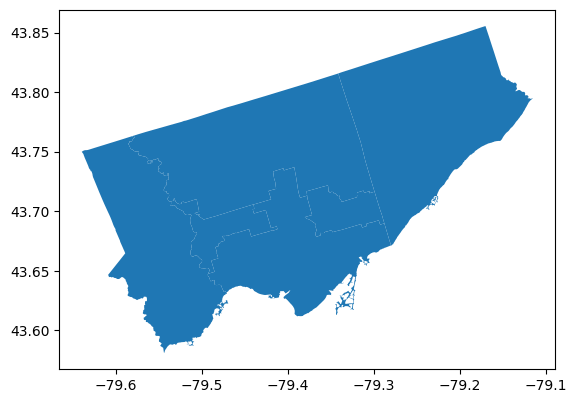

In [6]:
# Plotting the Former Municipality Boundaries Data file as a map
fmbd.plot()

Reprojection of the Former Municipality Boundaries Data file with the WGS 84 / UTM zone 33N projection.

<Axes: >

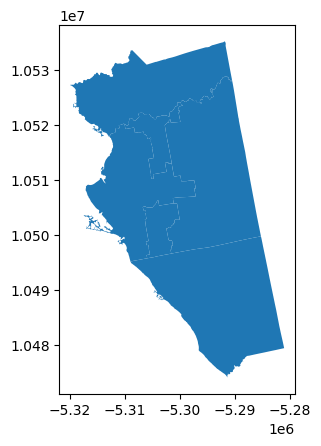

In [7]:
# Reprojecting Former Municipality Boundaries Data file to the WGS 84 / UTM zone 33N projection 
fmbd_new = fmbd.to_crs("EPSG:32633")
# Plotting new projected fmbd file
fmbd_new.plot()

Reprojection of the Former Municipality Boundaries Data file with the NAD 1983 Albers contiguous USA projection.

<Axes: >

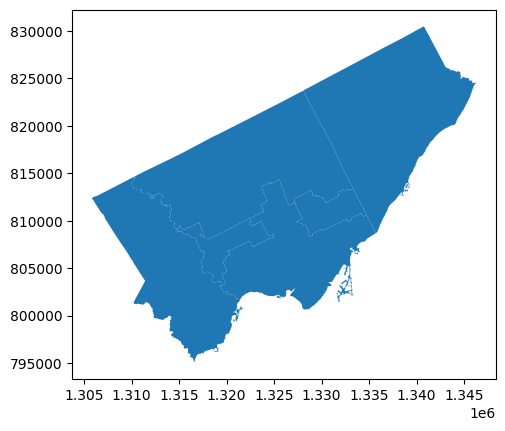

In [8]:
# Reprojecting Former Municipality Boundaries Data file to the NAD 1983 Albers contiguous USA projection 
fmbd_new2 = fmbd_new.to_crs("ESRI:102003")
# Plotting new projected fmbd file
fmbd_new2.plot()

This next block combines two columns from the Former Municipality Boundaries Data file to create a new column.

In [9]:
# Addding the AREA_SHORT_CODE column and the AREA_LONG_CODE column together to create the AREA_NEW_CODE column
fmbd["AREA_NEW_CODE"] = (
    fmbd["AREA_SHORT_CODE"] + fmbd["AREA_LONG_CODE"]
)
# Reading the new table of the same fmbd file
fmbd

,_id,AREA_ID,DATE_EFFECTIVE,AREA_ATTR_ID,PARENT_AREA_ID,AREA_SHORT_CODE,AREA_LONG_CODE,AREA_NAME,AREA_DESC,OBJECTID,geometry,AREA_NEW_CODE
0,1,49884.0,,49884.0,49886.0,14,14,YORK,YORK,11093905,"MULTIPOLYGON (((-79.49262 43.64744, -79.49249 ...",1414
1,2,643704.0,,643704.0,49886.0,08,08,NORTH YORK,NORTH YORK,11678465,"MULTIPOLYGON (((-79.53584 43.70812, -79.53591 ...",0808
2,3,49887.0,,49887.0,49886.0,06,06,EAST YORK,EAST YORK,12266929,"MULTIPOLYGON (((-79.28776 43.68978, -79.28909 ...",0606
3,4,435733.0,,435733.0,49886.0,01,01,SCARBOROUGH,SCARBOROUGH,12852625,"MULTIPOLYGON (((-79.28776 43.68978, -79.28792 ...",0101
4,5,1094349.0,,1094349.0,49886.0,19,19,ETOBICOKE,ETOBICOKE,14035025,"MULTIPOLYGON (((-79.48165 43.61872, -79.48180 ...",1919
5,6,760645.0,,760645.0,49886.0,04,04,TORONTO,TORONTO,14035041,"MULTIPOLYGON (((-79.39652 43.62232, -79.39685 ...",0404


The next code block creates buffers for the shelters geojson file and plots a map of these buffers.

<Axes: >

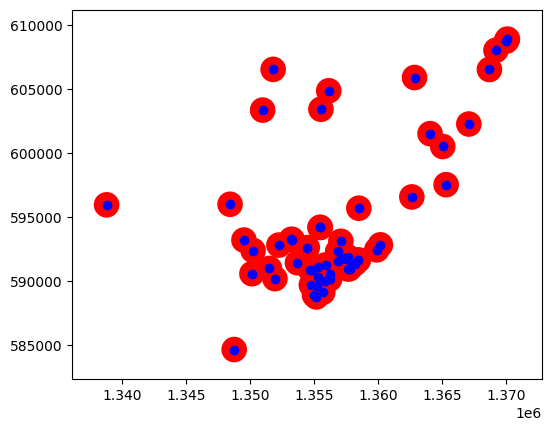

In [10]:
# The shelters file is read and is reprojected to a CRS that can be plotted on
shelters = gpd.read_file("data/shelters.geojson")
shelterscrs = shelters.to_crs("ESRI:102002")
# The next two lines creates red buffers and plots them on a map, with the shelters being coloured blue
base = shelterscrs.buffer(1000).plot(color="red")
shelterscrs.plot(ax=base,color="blue")

This next code block joins the waste and shelters file together.

In [13]:
# The waste file is read and is reprojected to a CRS that can be plotted on
waste = gpd.read_file("data/waste.geojson")
wastecrs = waste.to_crs("ESRI:102002")
# Each waste centre is joined with its closes shelter, and the tabular data is displayed

waste_with_shelters

,WARD_left,Address,Name,geometry,index_right,ADDRESS_PO,ADDRESS_FU,POSTAL_COD,MUNICIPALI,CITY,...,NEIGHBOURH,NEIGHBOU_1,COMMUNITY_,CONFIDENTI,MOTEL,CAPACITY,NAME,TYPE,TYPE2,CITY_OP
0,York West (8),"35 Vanley Cres, M3J2B7",Dufferin Transfer Station Resource Recovery Ce...,POINT (1346817.177 600996.717),27,14601973,25 Canterbury Pl,M2N0E3,NORTH YORK,Toronto,...,37,Willowdale West,NORTH YORK COMMUNITY COUNCIL,N,None,32,Eva's Place - Satellite,Single,Youth,None
1,Don Valley East (34),"188 Bermondsey Rd, M4A1Y1",Bermondsey Transfer Station,POINT (1360101.877 599764.164),23,8236601,2714 Danforth Ave,M4C1L7,former TORONTO,Toronto,...,62,East End-Danforth,TORONTO AND EAST YORK COMMUNITY COUNCIL,N,None,70,Dixon Hall - Heyworth House,Single,Mixed Adult,None
2,Etobicoke North (2),"120 Disco Rd, M9W1M4",Disco Transfer Station,POINT (1338017.558 591584.352),12,8133841,6 Warrendale Crt,M9V1P9,ETOBICOKE,Toronto,...,2,Mount Olive-Silverstone-Jamestown,ETOBICOKE YORK COMMUNITY COUNCIL,N,None,50,Youth Without Shelter,Single,Youth,None
3,York South-Weston (12),"50 Ingram Dr, M6M2L6",Ingram Transfer Station,POINT (1348496.986 594263.605),39,7195894,422 Gilbert Ave,M6E4X3,YORK,Toronto,...,109,Caledonia-Fairbanks,ETOBICOKE YORK COMMUNITY COUNCIL,N,None,35,Horizons for Youth,Single,Youth,None
4,Willowdale (24),"3350 Victoria Park Ave, M2H3K5",Victoria Park Transfer Station,POINT (1356279.068 608296.071),52,14198104,1651 Sheppard Ave E,M2J5H1,NORTH YORK,Toronto,...,53,Henry Farm,NORTH YORK COMMUNITY COUNCIL,N,None,28,Seaton House/Downsview Dells,Single,Single Men,Y
5,Scarborough-Rouge River (41),"1 Transfer Pl, M1S5H8",Scarborough Transfer Station,POINT (1364009.119 609521.439),17,13968838,1229 Ellesmere Rd,M1P4V8,SCARBOROUGH,Toronto,...,127,Bendale,SCARBOROUGH COMMUNITY COUNCIL,N,None,160,Birkdale Residence,Family,Family,Y
6,Toronto-Danforth (30),"400 Commissioners St, M4M3K2",Commissioners St. Transfer Station,POINT (1360422.485 591622.102),10,855691,875 Queen St E,M4M1J2,former TORONTO,Toronto,...,70,South Riverdale,TORONTO AND EAST YORK COMMUNITY COUNCIL,N,None,120,Woodgreen Red Door Queen,Family,Family,None
